In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan
from numpy import isnan
import sklearn.impute
from sklearn.impute import SimpleImputer as simi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/DScience'

Mounted at /content/drive
/content/drive/MyDrive/DScience


In [ ]:
bioty=pd.read_excel ('/content/drive/MyDrive/DScience/Visualizacion en Python/Biodiversity.xlsx')

In [1]:
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=c993b5580687f5f8c7ed48c50d060140e9708aeb262c21e1a4c2eb2caaa1499e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [2]:
! pip install bqplot
! pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 8.9 MB/s 
     |████████████████████████████████| 1.6 MB 40.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 7.7 MB/s 
     |████████████████████████████████| 9.8 MB 42.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=6d288fc39941bb1ec109dd83acfceeb06a714f807d4dce1ca9fd92af998c77e5
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=83ec0dc5941afe1115e325faae7405cd91d0fd8909ac4c8318a5b8ec476aabe8
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  At

In [ ]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

# Visualizacion y Transformacion del DataFrame

In [ ]:
bioty.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


In [ ]:
bioty.columns

Index(['Species ID', 'Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Record Status', 'Occurrence',
       'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status'],
      dtype='object')

In [ ]:
bioty.shape

(119259, 13)

In [ ]:
bioty.values

array([['ACAD-1000', 'Acadia National Park', 'Mammal', ..., 'Rare',
        'Resident', nan],
       ['ACAD-1001', 'Acadia National Park', 'Mammal', ..., 'Abundant',
        nan, nan],
       ['ACAD-1002', 'Acadia National Park', 'Mammal', ..., 'Common',
        nan, 'Species of Concern'],
       ...,
       ['ZION-2793', 'Zion National Park', 'Vascular Plant', ...,
        'Uncommon', nan, nan],
       ['ZION-2794', 'Zion National Park', 'Vascular Plant', ..., 'Rare',
        nan, nan],
       ['ZION-2795', 'Zion National Park', 'Vascular Plant', ...,
        'Uncommon', nan, nan]], dtype=object)

In [ ]:
bioty.info

<bound method DataFrame.info of        Species ID             Park Name        Category          Order  \
0       ACAD-1000  Acadia National Park          Mammal   Artiodactyla   
1       ACAD-1001  Acadia National Park          Mammal   Artiodactyla   
2       ACAD-1002  Acadia National Park          Mammal      Carnivora   
3       ACAD-1003  Acadia National Park          Mammal      Carnivora   
4       ACAD-1004  Acadia National Park          Mammal      Carnivora   
...           ...                   ...             ...            ...   
119254  ZION-2791    Zion National Park  Vascular Plant      Solanales   
119255  ZION-2792    Zion National Park  Vascular Plant        Vitales   
119256  ZION-2793    Zion National Park  Vascular Plant        Vitales   
119257  ZION-2794    Zion National Park  Vascular Plant  Zygophyllales   
119258  ZION-2795    Zion National Park  Vascular Plant  Zygophyllales   

                Family         Scientific Name  \
0             Cervidae       

In [ ]:
bioty.describe()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
count,119259,119259,119259,117787,117747,119259,119259,111619,97802,87489,60129,15207,2992
unique,119259,56,14,554,2332,46022,35827,41,10,10,28,24,7
top,ACAD-1000,Great Smoky Mountains National Park,Vascular Plant,Poales,Asteraceae,Falco peregrinus,None,Approved,Present,Native,Unknown,Breeder,Species of Concern
freq,1,6623,65221,11453,8843,56,27147,58694,57009,50814,21042,9062,2446


In [ ]:
valores=bioty.values
imputador=simi(missing_values=np.nan,strategy="most_frequent")
biodity= imputador.fit_transform(valores)
biodity=pd.DataFrame(biodity)

In [ ]:
biodity.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,Species of Concern
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,Breeder,Species of Concern
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,Breeder,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,Unknown,Breeder,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,Species of Concern


In [ ]:
biodity= biodity.rename(columns={0:'Species_ID', 1:'Park_Name', 2:'Category', 3:'Order', 4:'Family', 5:'Scientific_Name', 6:'Common_Names', 7:'Record_Status', 8:'Occurrence', 9:'Nativeness', 10:'Abundance', 11:'Seasonality', 12:'Conservation_Status'})
biodity.head()

,Species_ID,Park_Name,Category,Order,Family,Scientific_Name,Common_Names,Record_Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,Species of Concern
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,Breeder,Species of Concern
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,Breeder,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,Unknown,Breeder,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,Species of Concern


In [ ]:
biodity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119259 entries, 0 to 119258
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species_ID           119259 non-null  object
 1   Park_Name            119259 non-null  object
 2   Category             119259 non-null  object
 3   Order                119259 non-null  object
 4   Family               119259 non-null  object
 5   Scientific_Name      119259 non-null  object
 6   Common_Names         119259 non-null  object
 7   Record_Status        119259 non-null  object
 8   Occurrence           119259 non-null  object
 9   Nativeness           119259 non-null  object
 10  Abundance            119259 non-null  object
 11  Seasonality          119259 non-null  object
 12  Conservation_Status  119259 non-null  object
dtypes: object(13)
memory usage: 11.8+ MB


In [ ]:
biodity.describe()

,Species_ID,Park_Name,Category,Order,Family,Scientific_Name,Common_Names,Record_Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_Status
count,119259,119259,119259,119259,119259,119259,119259,119259,119259,119259,119259,119259,119259
unique,119259,56,14,554,2332,46022,35827,41,10,10,28,24,7
top,ACAD-1000,Great Smoky Mountains National Park,Vascular Plant,Poales,Asteraceae,Falco peregrinus,None,Approved,Present,Native,Unknown,Breeder,Species of Concern
freq,1,6623,65221,12925,10355,56,27147,66334,78466,82584,80172,113114,118713


In [ ]:
parkname = np.array(biodity.Park_Name)
(parkname, parkname_f) = np.unique(parkname, return_counts=True)
category = np.array(biodity.Category)
(category, category_f) = np.unique(category, return_counts=True)
family= np.array(biodity.Family)
(family, family_f) = np.unique(family, return_counts=True)          
recstat= np.array(biodity.Record_Status)
(recstat, recstat_f) = np.unique(recstat, return_counts=True)      
occur = np.array(biodity.Occurrence)
(occur, occur_f) = np.unique(occur, return_counts=True)
nativ= np.array(biodity.Nativeness)
(nativ, nativ_f) = np.unique(nativ, return_counts=True)
abund = np.array(biodity.Abundance)
(abund, abund_f) = np.unique(abund, return_counts=True)
season = np.array(biodity.Seasonality)
(season, season_f) = np.unique(season, return_counts=True)
constat = np.array(biodity.Conservation_Status)
(constat, constat_f) = np.unique(constat, return_counts=True)

In [ ]:
print(f'Park Name: {parkname} , Frecuencia: {parkname_f}')            
print(f'Category: {category} , Frecuencia: {category_f}')        
print(f'Family: {family} , Frecuencia: {family_f}')    
print(f'Record_Status: {recstat} , Frecuencia: {recstat_f}')    
print(f'Occurrence: {occur} , Frecuencia: {occur_f}')    
print(f'Nativeness: {nativ} , Frecuencia: {nativ_f}')    
print(f'Abundance: {abund} , Frecuencia: {abund_f}')    
print(f'Seasonality: {season} , Frecuencia: {season_f}')    
print(f'Conservation_Status: {constat} , Frecuencia: {constat_f}')   

Park Name: ['Acadia National Park' 'Arches National Park' 'Badlands National Park'
 'Big Bend National Park' 'Biscayne National Park'
 'Black Canyon of the Gunnison National Park' 'Bryce Canyon National Park'
 'Canyonlands National Park' 'Capitol Reef National Park'
 'Carlsbad Caverns National Park' 'Channel Islands National Park'
 'Congaree National Park' 'Crater Lake National Park'
 'Cuyahoga Valley National Park' 'Death Valley National Park'
 'Denali National Park and Preserve' 'Dry Tortugas National Park'
 'Everglades National Park'
 'Gates Of The Arctic National Park and Preserve'
 'Glacier Bay National Park and Preserve' 'Glacier National Park'
 'Grand Canyon National Park' 'Grand Teton National Park'
 'Great Basin National Park' 'Great Sand Dunes National Park and Preserve'
 'Great Smoky Mountains National Park' 'Guadalupe Mountains National Park'
 'Haleakala National Park' 'Hawaii Volcanoes National Park'
 'Hot Springs National Park' 'Isle Royale National Park'
 'Joshua Tree Na

# Graficos


## Matplotlib

Text(0.5, 0, 'Parques')

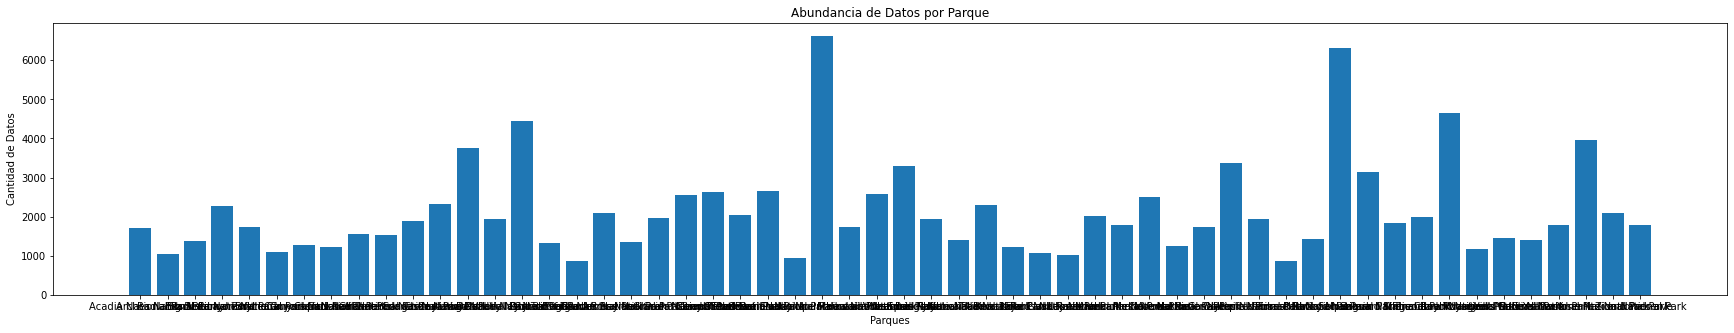

In [ ]:
# Grafico de barra , columna Park Name
fig, ax = plt.subplots(figsize=(30,5))
ax.bar(parkname,parkname_f)
ax.set_title('Abundancia de Datos por Parque')
ax.set_ylabel('Frecuencia de Datos')
ax.set_xlabel('Parques')

Text(0.5, 1.0, 'Cantidad de Especies por categoria')

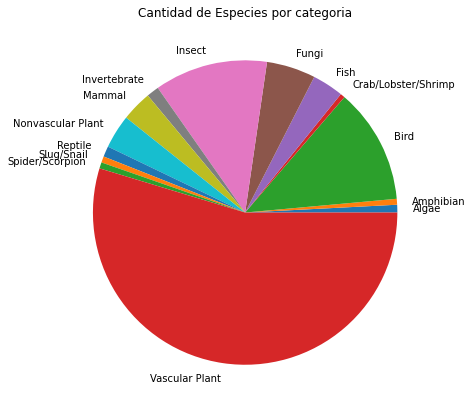

In [ ]:
# Grafico Circular, columna Category
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(category_f, labels = category,) 
ax.set_title('Cantidad de Especies por categoria')   

Text(0, 0.5, 'Frecuencia absoluta')

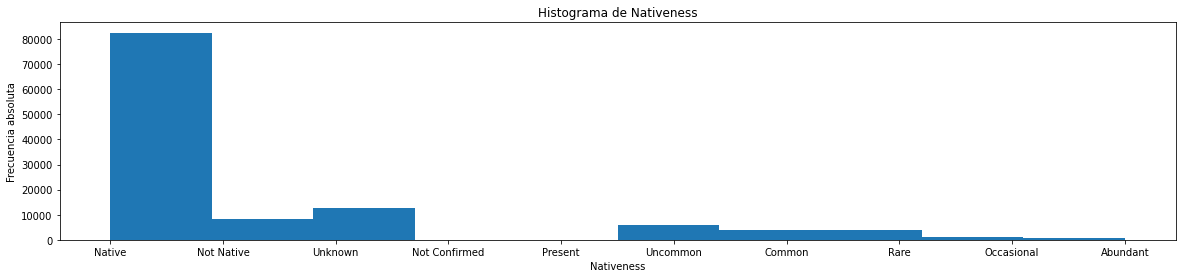

In [ ]:
# Histograma, Columna Nativeness
fig, ax = plt.subplots(figsize=(20, 4))
ax.hist(biodity.Nativeness)
ax.set_title('Histograma de Nativeness')
ax.set_xlabel('Nativeness')
ax.set_ylabel('Frecuencia absoluta')

## Seaborn

<Figure size 432x288 with 0 Axes>

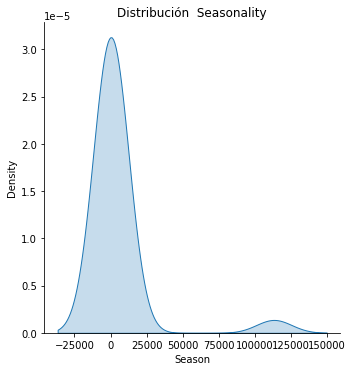

In [ ]:
#Grafico de distribuciones, columna Seasonality
seasonality = pd.Series (season_f,index=season)
plt.figure()
ax = sns.displot(data=seasonality, kind='kde',fill=True)
ax.set(xlabel='Season', title='Distribución  Seasonality')

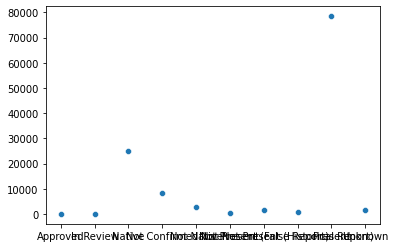

In [ ]:
#Grafico de puntos, Occurrence
occurence = pd.Series (occur_f,index=occur)
sns.scatterplot(data=occurence)

In [ ]:
#boxplot, columna Conservation_Status
conservation = pd.Series (constat_f,index=constat)
ax = sns.boxplot(data = (np.unique((np.array(biodity.Conservation_Status)), return_counts=True ))


SyntaxError: ignored